# <font color='red'>SGD Algorithm to predict movie ratings</font>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


<font color='red'> Reading the csv file </font>

In [1]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [2]:
data.shape

(89992, 3)

<font color='red'>Creating adjacency matrix </font>

In [3]:
from scipy.sparse import csr_matrix
adjacency_matrix =csr_matrix((data['rating'],(data['user_id'],data['item_id'])),dtype=int) # write your code of adjacency matrix here

In [4]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [5]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

In [6]:
# using adjacency_matrix for SVD decompostion

from sklearn.utils.extmath import randomized_svd
import numpy as np

U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 5)
(5,)
(1681, 5)


<font color='red'>Compute mean of ratings</font>

In [7]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    return ratings.mean()

In [8]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [9]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [10]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    return np.zeros(dim)

In [11]:
dim= adjacency_matrix.shape[0]# giving the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [12]:
dim= adjacency_matrix.shape[1]# giving the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [13]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [14]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    res=alpha*(2*b_i[user_id])+2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))*(-1)
    return res

<font color='cyan'>Grader function -4 </font>

In [15]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)

# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [16]:
def derivative_dc(user_id,item_id,rating,U,V,mu):
    '''In this function, we will compute dL/dc_j'''
    res=alpha*(2*c_j[item_id])+2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id]))*(-1)
    return res

<font color='cyan'>Grader function - 5 </font>

In [17]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)

# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


In [18]:
y=np.array(data['rating'])
user_id=np.array(data['user_id'])
item_id=np.array(data['item_id'])

In [19]:
epoch=50
learning_rate=0.001
MSE=[]
curr_mse=0
length=len(data)
for i in range(1,epoch): # each epoch
    y_pred=[]
    prev_mse=curr_mse
    for index in range(length): # for each user and movie
        userid=user_id[index]
        itemid=item_id[index]
        b_i[userid]=b_i[userid]-learning_rate*derivative_db(userid,itemid,y[index],U,VT,mu,alpha) #updating user bais
        c_j[itemid]=c_j[itemid]-learning_rate*derivative_dc(userid,itemid,y[index],U,VT,mu) #updating movie bais
    for ind in range(length):
        userid=user_id[ind]
        itemid=item_id[ind]
        ypred=mu+b_i[userid]+c_j[itemid]+np.dot(U[userid],VT.T[itemid]) #predicting rating
        y_pred.append(ypred)
    y_pred=np.array(y_pred)   
    curr_mse=np.mean(np.square(y-y_pred)) #calculating mean squared error
    print("at epoch ",i," MSE=",curr_mse)
    if np.round(curr_mse,3)==np.round(prev_mse,3):
        epoch_value=i
        break
    MSE.append(curr_mse)

at epoch  1  MSE= 1.0789504830689258
at epoch  2  MSE= 1.0050283469912962
at epoch  3  MSE= 0.9657973842122543
at epoch  4  MSE= 0.9413218441323338
at epoch  5  MSE= 0.924432128471976
at epoch  6  MSE= 0.9119611421001191
at epoch  7  MSE= 0.9023060448416521
at epoch  8  MSE= 0.8945707810866832
at epoch  9  MSE= 0.8882141270920174
at epoch  10  MSE= 0.882888231555782
at epoch  11  MSE= 0.8783578964442278
at epoch  12  MSE= 0.8744573121608594
at epoch  13  MSE= 0.8710654755863043
at epoch  14  MSE= 0.8680915084953886
at epoch  15  MSE= 0.8654655008991121
at epoch  16  MSE= 0.8631325796497138
at epoch  17  MSE= 0.8610489360677697
at epoch  18  MSE= 0.8591790861510693
at epoch  19  MSE= 0.8574939310896514
at epoch  20  MSE= 0.8559693522877421
at epoch  21  MSE= 0.8545851725570873
at epoch  22  MSE= 0.8533243739799534
at epoch  23  MSE= 0.8521724994546295
at epoch  24  MSE= 0.8511171881794503
at epoch  25  MSE= 0.8501478104737527
at epoch  26  MSE= 0.8492551774119711
at epoch  27  MSE= 0.84

<font color='red'>Plotting epoch number vs MSE </font>

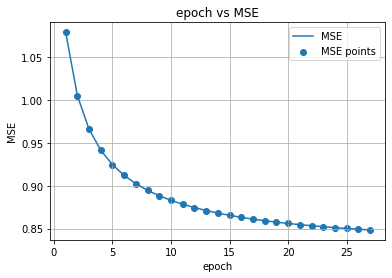

In [28]:
#plotting MSE for each epoch
import matplotlib.pyplot as plt

epoch=range(1,epoch_value)

plt.plot(epoch,MSE,label='MSE')
plt.scatter(epoch,MSE,label='MSE points')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("epoch vs MSE")
plt.grid()
plt.show()

<font color='red'> Task 2</font>

In [21]:
user=pd.read_csv('user_info.csv.txt') #reading csv

In [22]:
user.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [23]:
X=U # user features
y=user['is_male'] #target variable

In [24]:
length=len(user)

In [43]:
#applying logisticRegression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X, y)

In [44]:
pred=reg.predict(X)

In [51]:
from sklearn.metrics import confusion_matrix
C=confusion_matrix(y,pred)
print(C)

[[  0 273]
 [  0 670]]


<h3>After scaling user features</h3>

In [54]:
from sklearn import preprocessing

In [55]:
ss= preprocessing.StandardScaler()
X_scaling=ss.fit_transform(X)

In [56]:
#applying logisticRegression

reg = LogisticRegression().fit(X_scaling, y)
pred=reg.predict(X)

In [57]:
C=confusion_matrix(y,pred)
print(C)

[[  0 273]
 [  0 670]]


In [66]:
user['is_male'].value_counts()

1    670
0    273
Name: is_male, dtype: int64

<b>Here if you observe the confusion matrix values of the model didn't change after scaling of user features</b><br>
<b>From the confusion matrix we can says <br>
<b>all the users with class label 1 are correctly predicted as 1</b><br>
<b>and all users with class label 0 are incorrectly predicated as 1<b><br>
<b>i.e all the users either with class label 1 or 0 are predicated as 1<b><br>
<b>We can conclude that the user features computed are not helpful in predicting the gender of the user<b>